In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# 기존 Sequential을 이용한 기본적인 모델

model = Sequential()
model.add(Dense(3, input_dim = 4, activation = 'softmax'))

### Functional API로 모델 만들어보기.

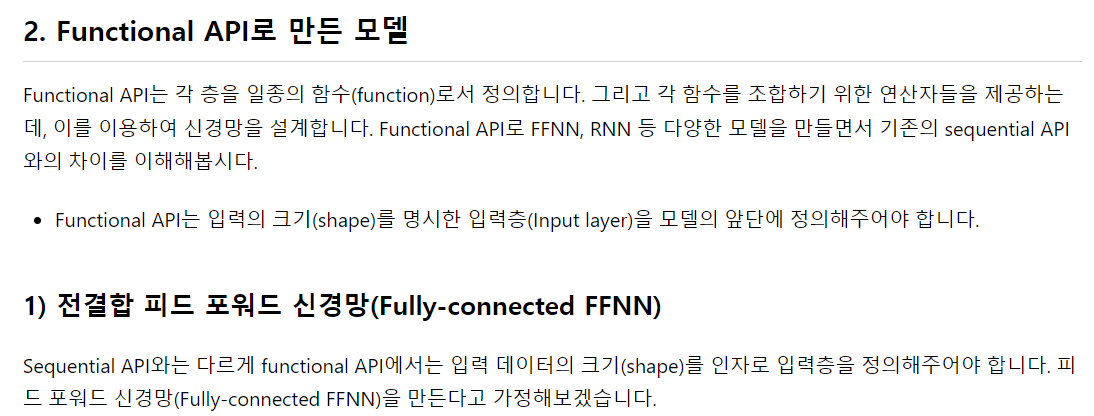

In [3]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [4]:
# 10개의 입력을 받는 입력층을 생성

inputs = Input(shape = (10,))

In [5]:
#은닉층과 출력층 추가
inputs = Input(shape = (10,))
hidden1 = Dense(64, activation = 'relu')(inputs) #전 층을 계속 추가해주기.
hidden2 = Dense(64, activation = 'relu')(hidden1)
output = Dense(1, activation = 'sigmoid')(hidden2)
model = Model(inputs = inputs, outputs = output)

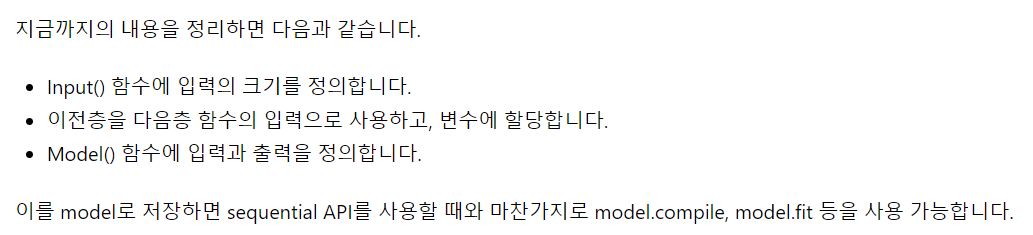

In [6]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crosstentropy', metrics = ['accuracy'])

In [7]:
#FFNN 만들어보기

inputs = Input(shape = (10,))
x = Dense(8, activation = 'relu')(inputs)
x = Dense(4, activation = 'relu')(x)
x = Dense(1, activation = 'linear')(x)
model = Model(inputs, x)

### 선형 회귀, 로지스틱 회귀
#### Functional API로 구현해보기

In [8]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

In [9]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

inputs = Input(shape = (1,))
output = Dense(1, activation = 'linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(learning_rate = 0.01)

linear_model.compile(optimizer = sgd, loss = 'mse', metrics = ['mse'])
linear_model.fit(X, y, epochs = 300)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 3643.1997 - mse: 3643.1997
Epoch 2/300
1/1 [==============================] - 0s 13ms/step - loss: 449.3322 - mse: 449.3322
Epoch 3/300
1/1 [==============================] - 0s 13ms/step - loss: 56.3496 - mse: 56.3496
Epoch 4/300
1/1 [==============================] - 0s 14ms/step - loss: 7.9950 - mse: 7.9950
Epoch 5/300
1/1 [==============================] - 0s 13ms/step - loss: 2.0442 - mse: 2.0442
Epoch 6/300
1/1 [==============================] - 0s 14ms/step - loss: 1.3110 - mse: 1.3110
Epoch 7/300
1/1 [==============================] - 0s 13ms/step - loss: 1.2197 - mse: 1.2197
Epoch 8/300
1/1 [==============================] - 0s 12ms/step - loss: 1.2074 - mse: 1.2074
Epoch 9/300
1/1 [==============================] - 0s 11ms/step - loss: 1.2048 - mse: 1.2048
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 1.2035 - mse: 1.2035
Epoch 11/300
1/1 [==============================] - 0s 12ms

In [10]:
#Logistic Regression

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

In [11]:
# 다중 입력을 받는 모델 만들어보기.

from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

In [12]:
#입력층 두 개 정의하기
inputA = Input(shape = (64,))
inputB = Input(shape = (128,))

#첫번째 입력층으로부터 분기되어 진행되는 인공신경망을 정의하기.
x = Dense(16, activation = 'relu')(inputA)
x = Dense(8, activation = 'relu')(x)
x = Model(inputs = inputA, outputs = x)

#두번째 입력층으로부터 분기되어 진행되는 인공신경망을 정의하기.
y = Dense(64, activation = 'relu')(inputB)
y = Dense(32, activation = 'relu')(y)
y = Dense(8, activation = 'relu')(y)
y = Model(inputs = inputB, outputs = y)

#두 개를 연결하기
result = concatenate([x.output, y.output])
z = Dense(2, activation = 'relu')(result)
z = Dense(1, activation = 'linear')(z)

model1 = Model(inputs = [x.input, y.input], outputs = z)

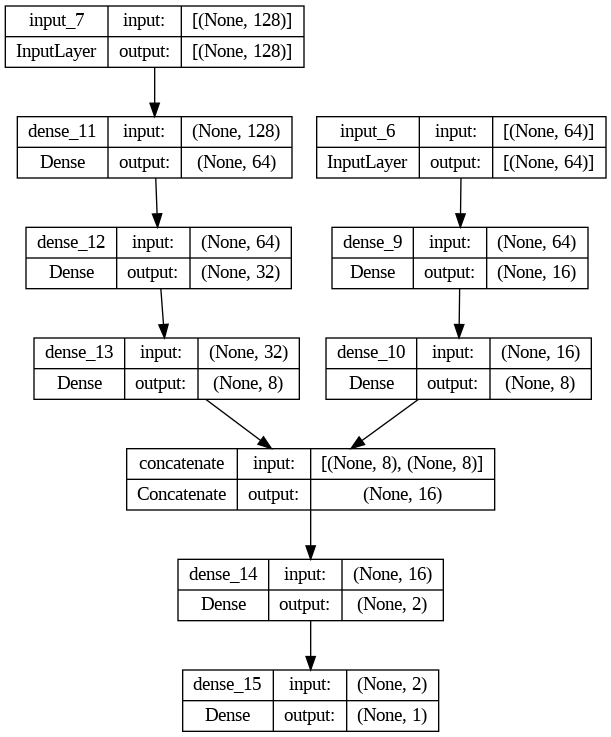

In [16]:
#인공신경망 시각화 !pip install pydot graphviz

from tensorflow.keras.utils import plot_model
plot_model(model1, show_shapes=True, show_layer_names=True)

In [18]:
#순환 신경망(Recurrent Neural Network) 은닉층 사용하기
#구체적인 RNN은 다음 챕터에서.

from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

inputs = Input(shape = (50,1))
lstm_layer = LSTM(10)(inputs)
x = Dense(10, activation = 'relu')(lstm_layer)
output = Dense(1, activation = 'sigmoid')(x)
modelRNN = Model(inputs = inputs, outputs = output)


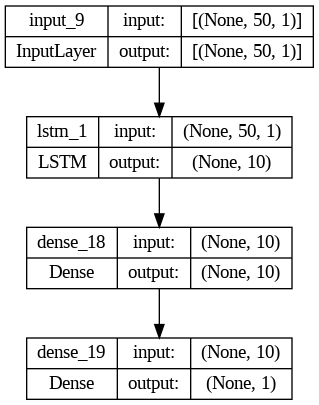

In [19]:
plot_model(modelRNN, show_shapes=True, show_layer_names=True)

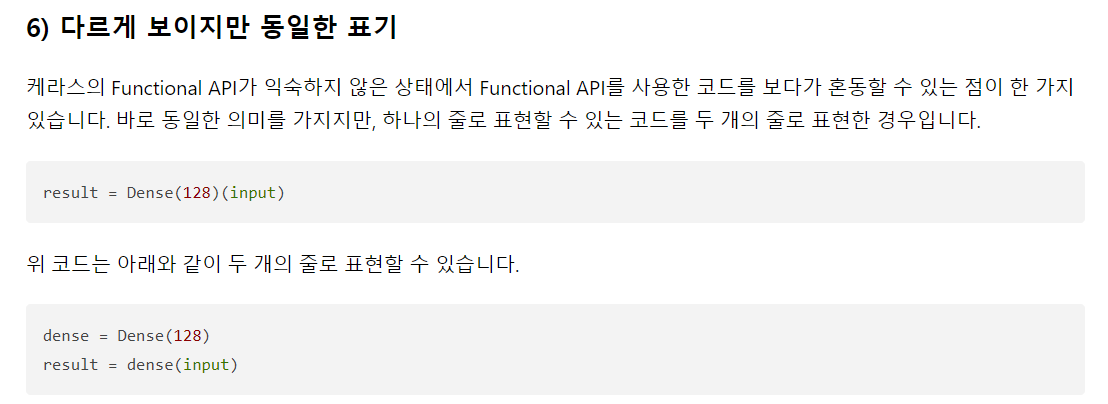